### Exploratory Data Analysis on Spotify 2023 Dataset

In [626]:
import pandas as pd

In [627]:
import matplotlib.pyplot as plt

In [628]:
import seaborn as sns

In [729]:
spoti = pd.read_excel('spotify-eda-2023.xlsx')
spoti

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


Overview of Dataset

How many rows and columns does the dataset contain?

In [733]:
spoti.shape

(953, 24)

What are the data types of each column? Are there any missing values?

In [736]:
spoti.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [738]:
spoti.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Basic Descriptive Statistics

What are the mean, median, and standard deviation of the streams column?

In [742]:
spoti['streams'] = pd.to_numeric(spoti['streams'], errors='coerce')

In [744]:
mean = spoti['streams'].mean()
print("Mean:", mean)

Mean: 514137424.93907565


In [746]:
median = spoti['streams'].median()
print("Median:", median)

Median: 290530915.0


In [748]:
standard_deviation = spoti['streams'].std()
print("Standard Deviation:", standard_deviation)

Standard Deviation: 566856949.0388832


What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

Outliers in released_year: 151


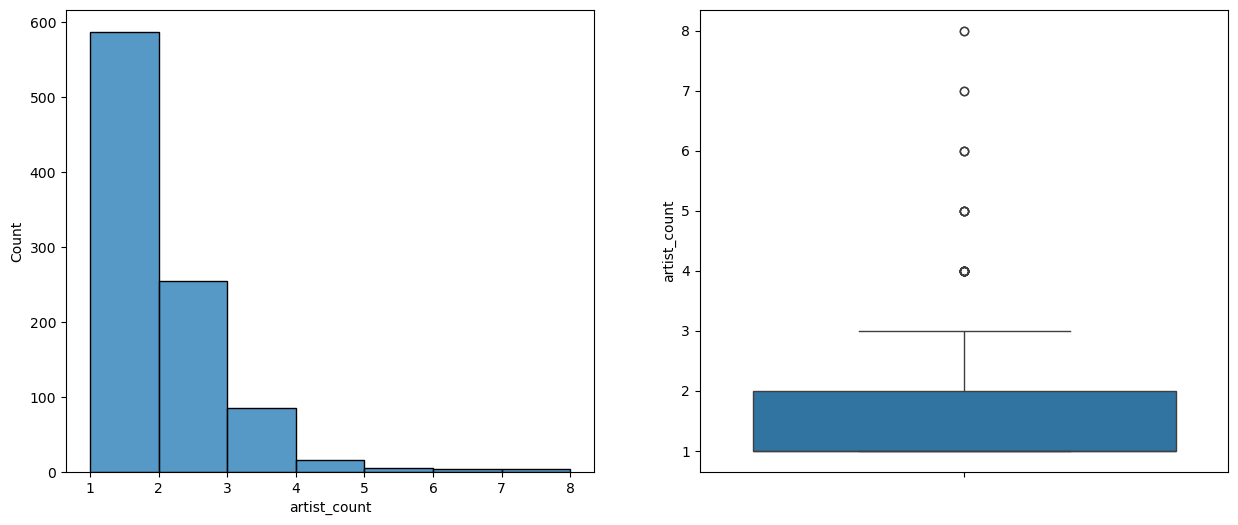

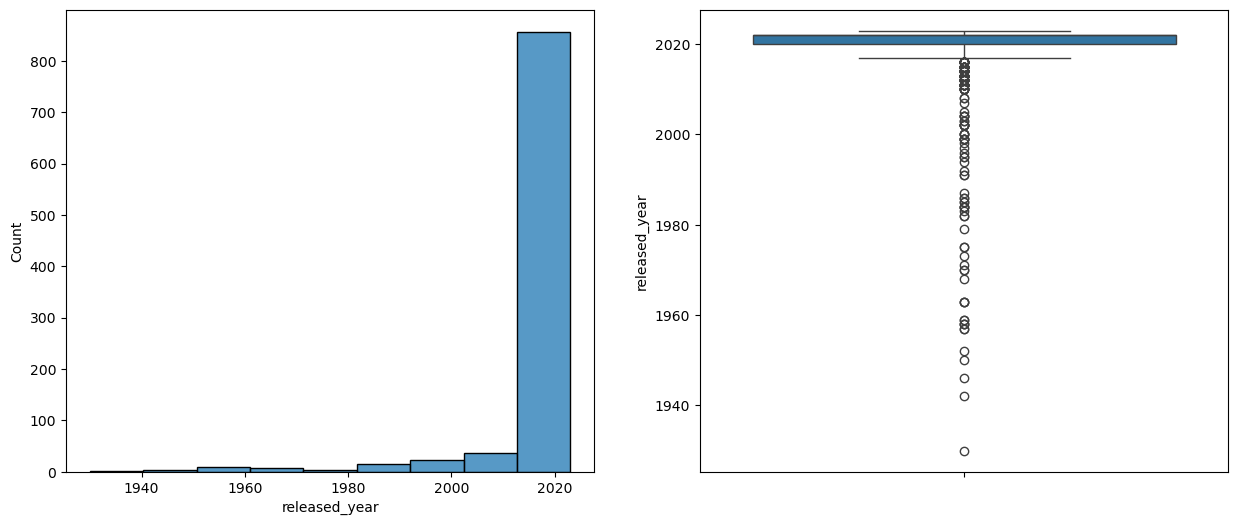

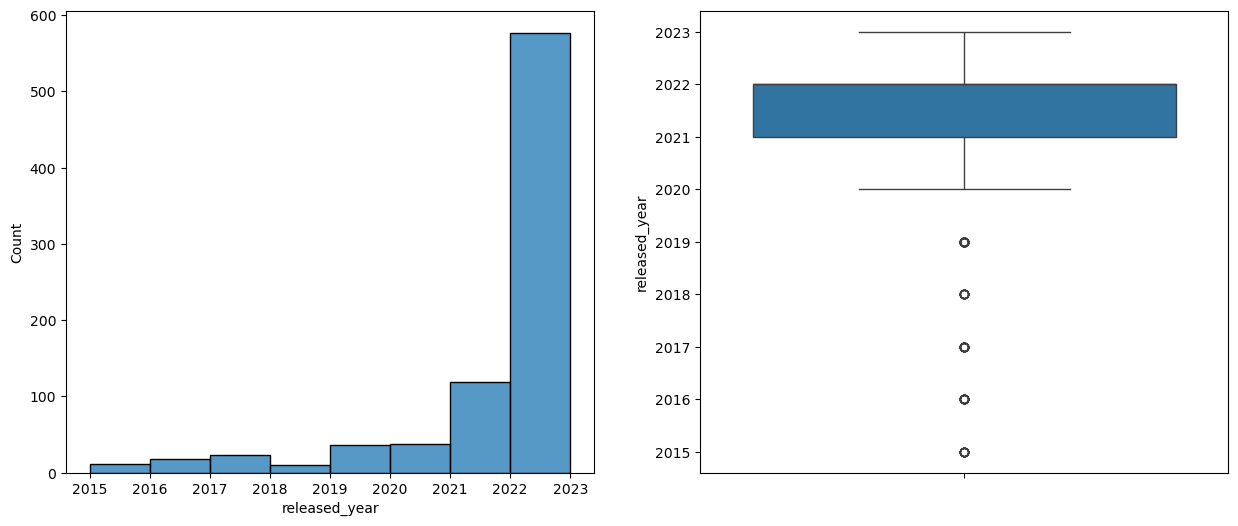

In [751]:
def graphs(col, binwidth, df=spoti):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    sns.histplot(df[col], binwidth=binwidth, ax=axes[0])
    sns.boxplot(df[col], ax=axes[1])

graphs('artist_count', binwidth=1)
graphs('released_year', binwidth=10)

min= spoti.released_year.quantile(0.25) - 1.5 * (spoti.released_year.quantile(0.75) - spoti.released_year.quantile(0.25))
outliers = spoti[spoti.released_year < min].shape[0]


graphs('released_year', binwidth=1, df=spoti[spoti.released_year > 2014])

print(f'Outliers in released_year: {outliers}')

Top Performers

Which track has the highest number of streams? Display the top 5 most streamed tracks.

In [754]:
streams = spoti.sort_values(by='streams', ascending=False)
streams.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5


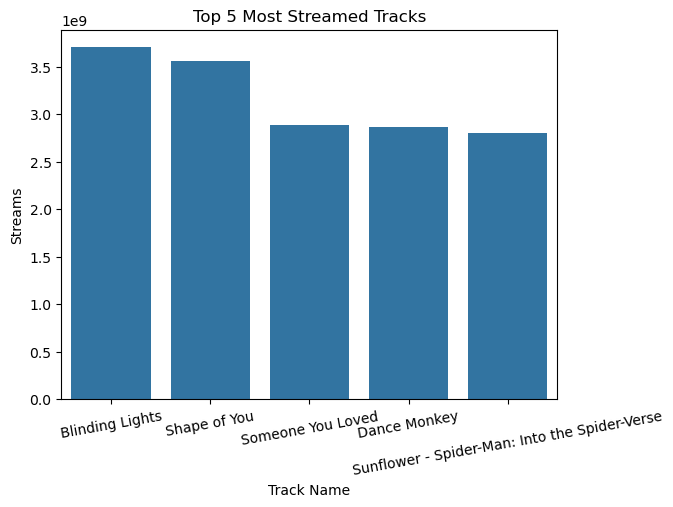

In [757]:
sns.barplot(x='track_name', y='streams', data=streams.head())
plt.xlabel("Track Name")
plt.ylabel("Streams")
plt.title("Top 5 Most Streamed Tracks")
plt.tick_params(axis='x', rotation=10);

Who are the top 5 most frequent artists based on the number of tracks in the dataset?

In [793]:
artists = spoti.groupby('artist(s)_name').sum('artist_count').sort_values(by='artist_count', ascending=False)
artists.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist(s)_name,,,,,,,,,,,,,,,,,,
Taylor Swift,34,68691,256,510,132974,542,1.405366e+10,1796,1866,58,4268,2032,1209,1931,948,23,524,251
The Weeknd,22,44452,75,276,144053,180,1.418555e+10,1677,1348,23,2634,1269,930,1406,453,31,433,173
False,20,28286,70,225,67656,89,5.720647e+09,1081,491,74,1805,945,781,852,488,2,213,97
Bad Bunny,19,38414,90,170,51317,268,9.997800e+09,589,852,56,2264,1428,1011,1268,434,63,345,187
SZA,19,38415,226,197,44539,110,4.557811e+09,680,1070,27,2226,1101,873,1001,865,38,376,188


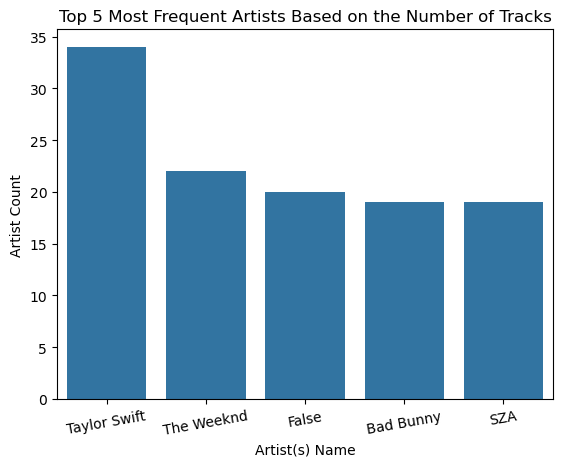

In [795]:
sns.barplot(x='artist(s)_name', y='artist_count', data=artists.head())
plt.xlabel("Artist(s) Name")
plt.ylabel("Artist Count")
plt.title("Top 5 Most Frequent Artists Based on the Number of Tracks")
plt.tick_params(axis='x', rotation=10);

Temporal Trends

Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.


Text(0.5, 1.0, 'Number of Tracks Released per Year')

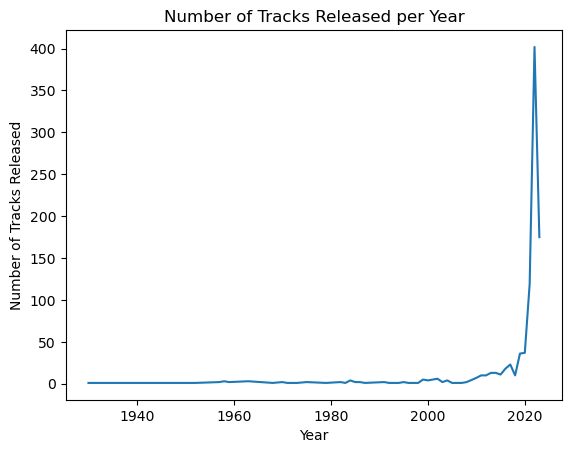

In [766]:
Tracks_per_year = spoti.groupby('released_year').size()
plt.plot(year)
plt.xlabel("Year")
plt.ylabel("Number of Tracks Released")
plt.title("Number of Tracks Released per Year")

Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

Month with the most releases: 1


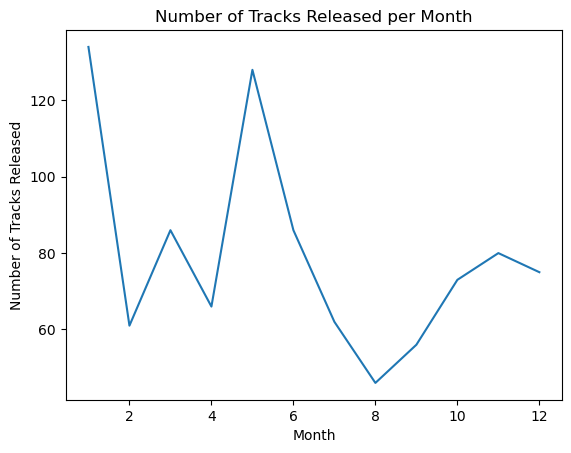

In [769]:
Tracks_per_month = spoti.groupby('released_month').size()
plt.plot(month)
plt.xlabel("Month")
plt.ylabel("Number of Tracks Released")
plt.title("Number of Tracks Released per Month")
month_with_the_most_releases = month.idxmax()
print("Month with the most releases:",month_with_the_most_releases)

Genre and Music Characteristics

Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

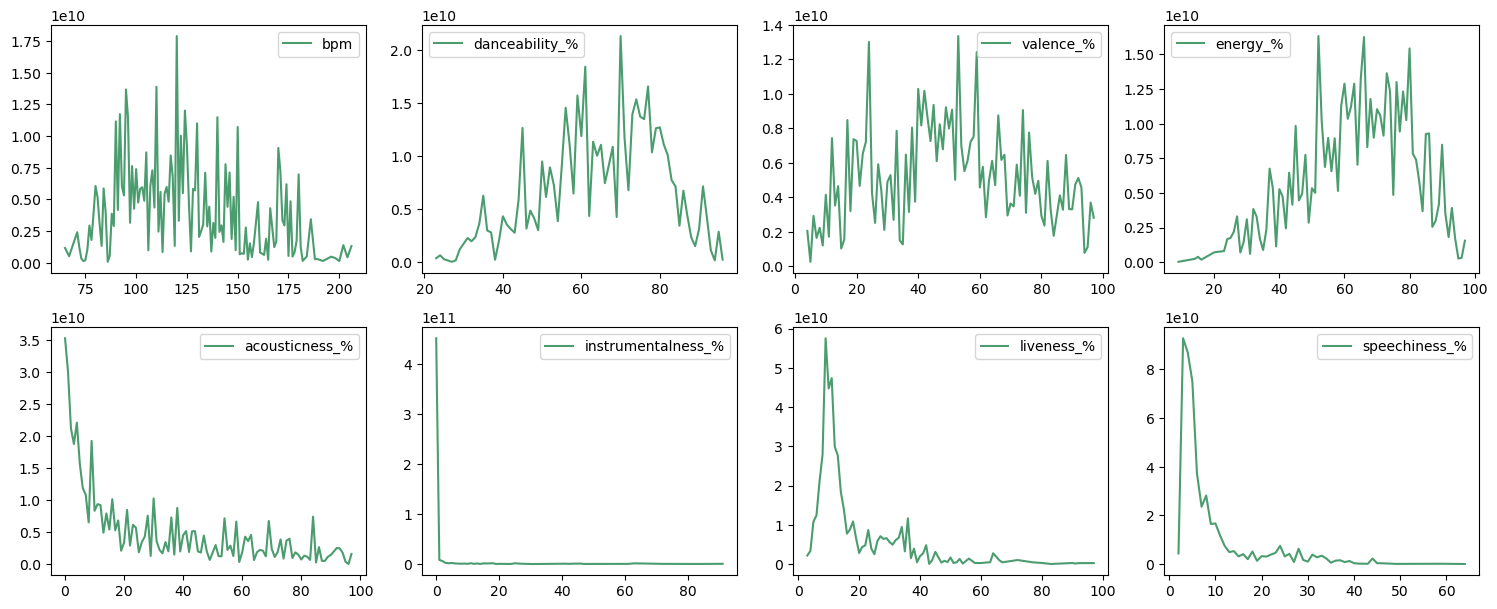

In [773]:
attributes = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,12))
axes = axes.flatten()
for ix, attr in enumerate(attributes):
    spoti_sub = spoti[['streams', attr]].groupby(attr).sum().sort_values(attr)
    axes[ix].plot(spoti_sub.index, spoti_sub['streams'], label=attr, color='#4b9c6f')
    axes[ix].legend()
for ax in axes[len(attributes):]:
    fig.delaxes(ax) 
plt.tight_layout()
plt.show()

Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

Danceability vs. Energy Correlation: 0.19809484837625715
Valence vs. Acousticness Correlation: -0.08190727483082758


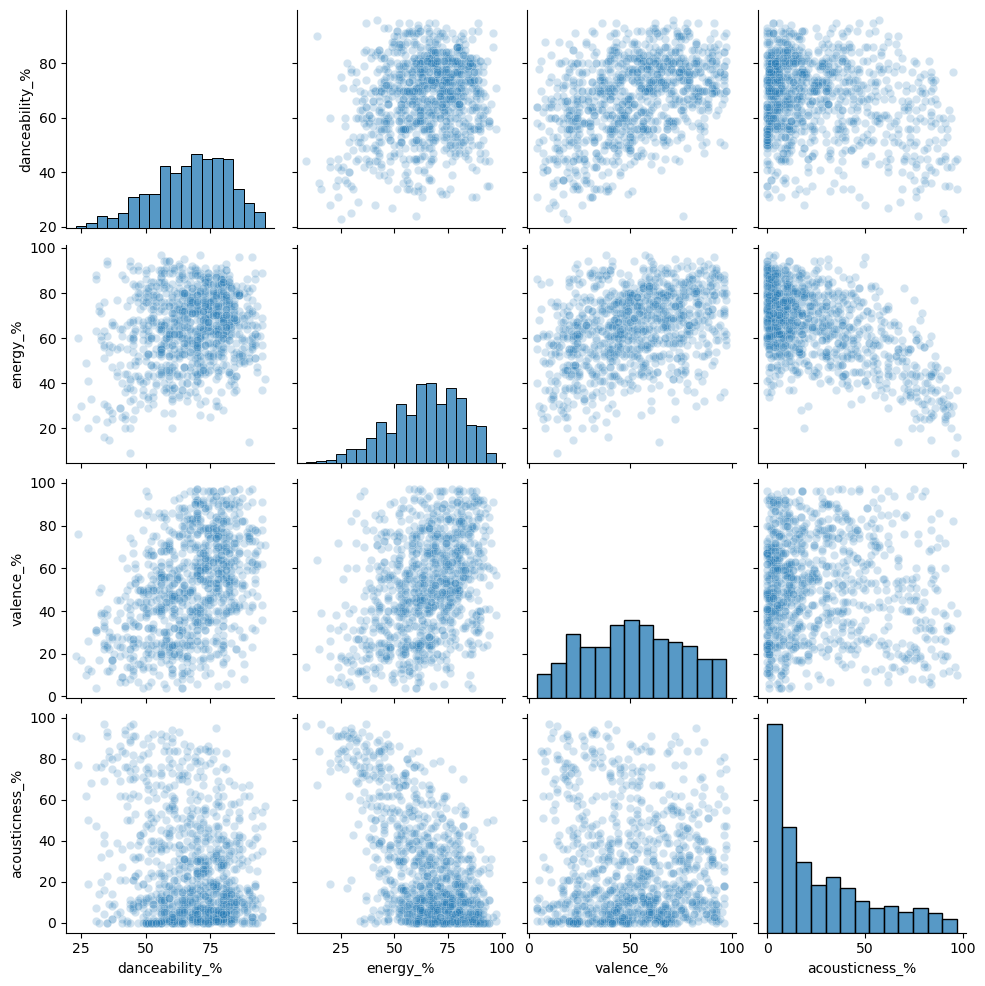

In [775]:
correlation = spoti[['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']]
print("Danceability vs. Energy Correlation:", spoti_attr['danceability_%'].corr(spoti_attr['energy_%']))
print("Valence vs. Acousticness Correlation:", spoti_attr['valence_%'].corr(spoti_attr['acousticness_%']))

sns.pairplot(correlation, plot_kws={'alpha': 0.2})

Platform Popularity

How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?

[Text(0.5, 1.0, 'Track Counts Across Platforms')]

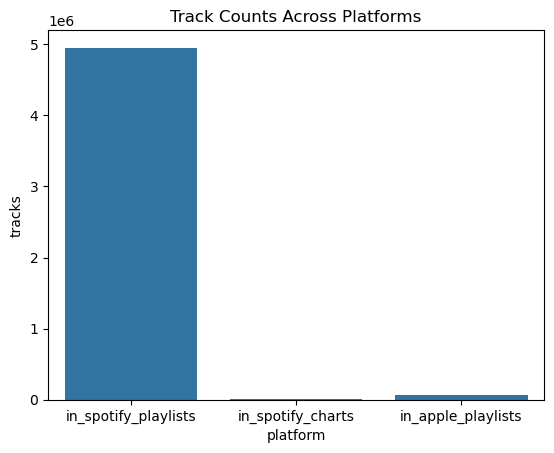

In [779]:
tracks = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']
playlist_data = pd.DataFrame({'platform': playlists, 'tracks': [spoti[p].sum() for p in playlists]})
sns.barplot(x='platform', y='tracks', data=playlist_data).set(title="Track Counts Across Platforms")

Advanced Analysis

Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

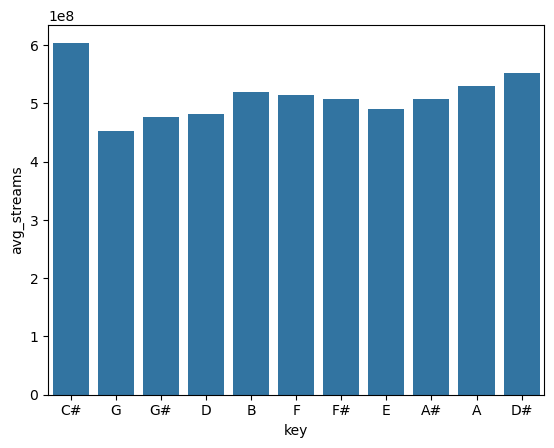

In [782]:
key = spoti.groupby('key')['streams'].sum().reset_index().sort_values('streams', ascending=False)

key['avg_streams'] = key['streams'] / spoti['key'].value_counts().values
sns.barplot(x='key', y='avg_streams', data=spoti_key)

mode = spoti.groupby('mode')['streams'].sum().reset_index().sort_values('streams', ascending=False)


<Axes: xlabel='mode', ylabel='avg_streams'>

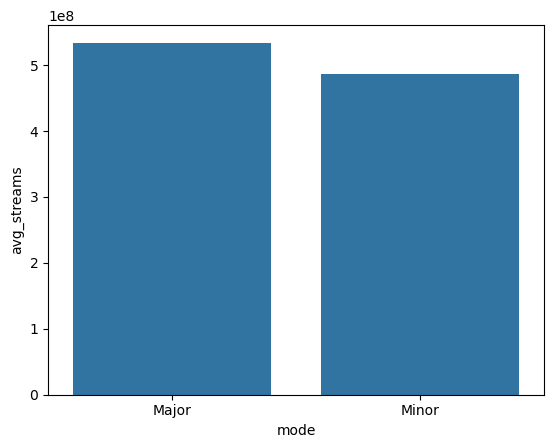

In [783]:
mode['avg_streams'] = mode['streams'] / spoti['mode'].value_counts().values
sns.barplot(x='mode', y='avg_streams', data=mode)


Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

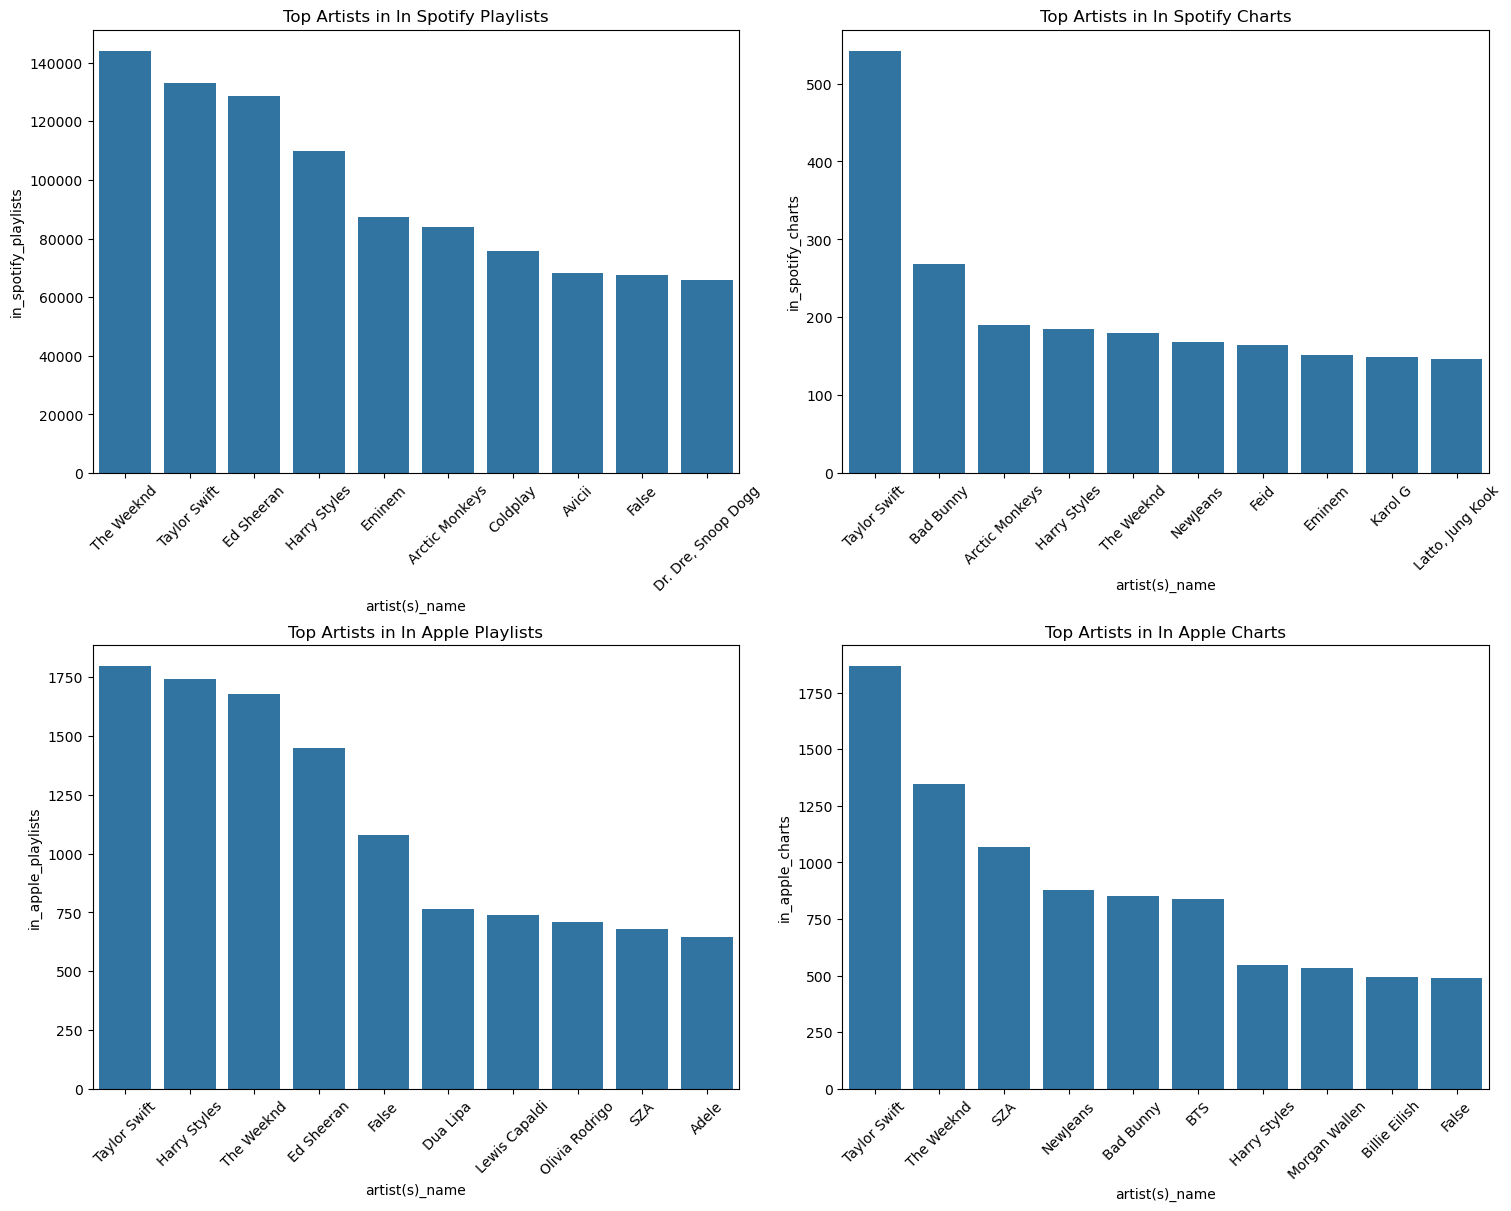

In [785]:
charts_and_playlist = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists','in_apple_charts']
fig, axes = plt.subplots(2, 2, figsize=(15, 12), constrained_layout=True)
axes = axes.flatten()

for i, platform in enumerate(platforms):
    top_artists = spoti.groupby('artist(s)_name')[platform].sum().nlargest(10).reset_index()
    sns.barplot(x='artist(s)_name', y=platform, data=top_artists, ax=axes[i]).set(title=f"Top Artists in {platform.replace('_', ' ').title()}")
    axes[i].tick_params(axis='x', rotation=45)

plt.show()